In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importamos el csv modificado
dataset = pd.read_csv(r'/Users/jorgeemiliano/Desktop/Segementacion/dataset_modificado.csv')
print(dataset.head())

   N° de factura     Fecha de factura  ID Cliente            País  Cantidad  \
0         548370   3/30/2021 16:14:00     15528.0  United Kingdom       123   
1         575767  11/11/2021 11:11:00     17348.0  United Kingdom       163   
2         549106    4/6/2021 12:08:00     17045.0  United Kingdom         1   
3         573112  10/27/2021 15:33:00     16416.0  United Kingdom       357   
4         576630   11/16/2021 8:38:00     13816.0         Germany        91   

    Monto  
0  229.33  
1  209.73  
2   39.95  
3  344.83  
4  199.98  


## Análisis de las métricas de Ventas

Ahora que ya tenemos limpio el dataset podemos continuar con nuestro análisis. Primero comenzamos revisando la cantidad de facturas que genera cada país.

In [3]:
# Análisis de número de facturas por país
factura_por_pais = dataset['País'].value_counts()
dataset['Num_Facturas'] = dataset['País'].map(factura_por_pais)

In [4]:
# Porcentaje de facturas que cada país representa y almacenar los resultados en una nueva columna
dataset['Porcentaje_facturas'] = dataset['Num_Facturas'] / len(dataset) * 100
# Ordenamos el dataset por número de facturas de forma descendente
dataset = dataset.sort_values('Num_Facturas', ascending=False)

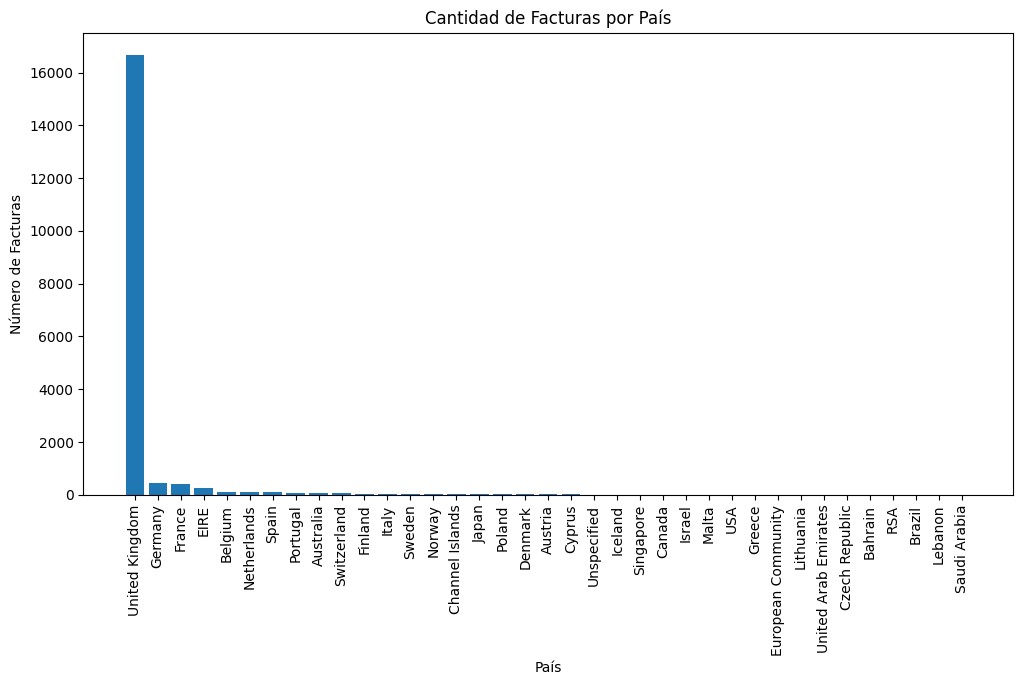

In [5]:
# Gráfico de barras para visualizar el número de facturas
plt.figure(figsize=(12, 6))
plt.bar(dataset['País'], dataset['Num_Facturas'])
plt.xlabel('País')
plt.ylabel('Número de Facturas')
plt.title('Cantidad de Facturas por País')
plt.xticks(rotation=90)
plt.show()

Es evidente que: 
* I) Los clientes de UK son aquellos que realizan la mayor cantidad de compras.
* II) Los siguientes 5 países con mayor cantidad de compras son Europeos(Alemania, Francia, Irlanda, Bélgica y Holanda).

¿Por qué estos países Europeos son los que más compran en UK Merch?

Hay varias razones, pero la más lógica y probable sería la "Proximidad geográfica y facilidad de acceso". La cercanía geográfica de UK con Europa hace que el comercio y la logística sean más convenientes y eficientes.


## Análisis del monto por país

Aquí podemos hacer un análisis más profundo. Además del monto sumado, sería interesante conocer el monto promedio, el monto mínimo y el monto máximo en cada caso

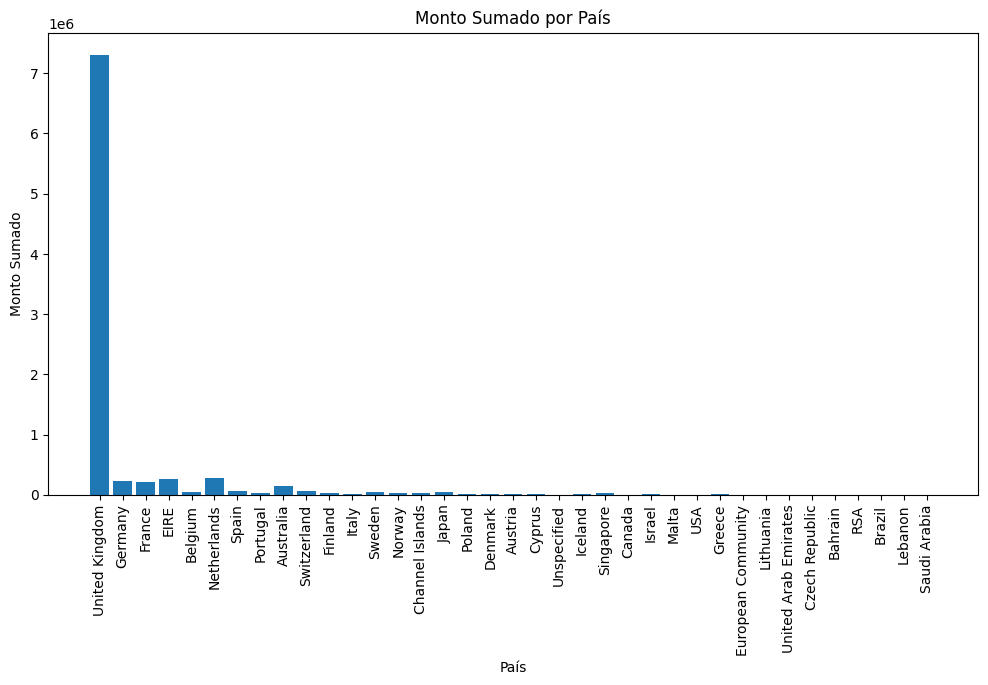

                       País  Monto_Sumado  Porcentaje_Monto  Monto_Promedio  \
0            United Kingdom    7308391.55         82.011638      438.258068   
2287                Germany     228867.14          2.568249      500.803370   
17535                France     209024.05          2.345578      535.959103   
15715                  EIRE     265545.90          2.979842     1017.417241   
6346                Belgium      41196.34          0.462288      420.370816   
11462           Netherlands     285446.34          3.203156     3004.698316   
4924                  Spain      61577.11          0.690992      684.190111   
9457               Portugal      33439.89          0.375248      586.664737   
4626              Australia     138521.31          1.554427     2430.198421   
15741           Switzerland      56443.95          0.633390     1106.744118   
7789                Finland      22546.08          0.253002      549.904390   
7964                  Italy      17483.24          0

In [6]:
# Monto sumado por país
dataset['Monto_Sumado'] = dataset['Monto'].groupby(dataset['País']).transform('sum')

# Porcentaje del monto sumado por país
total_monto = dataset['Monto'].sum()
dataset['Porcentaje_Monto'] = (dataset['Monto_Sumado'] / total_monto) * 100

# Promedio por país
dataset['Monto_Promedio'] = dataset['Monto'].groupby(dataset['País']).transform('mean')
# Monto mínimo por país
dataset['Monto_Mínimo'] = dataset['Monto'].groupby(dataset['País']).transform('min')
# Monto máximo por pais
dataset['Monto_Máximo'] = dataset['Monto'].groupby(dataset['País']).transform('max')

# Gráfico 
plt.figure(figsize=(12, 6))
plt.bar(dataset['País'], dataset['Monto_Sumado'])
plt.xlabel('País')
plt.ylabel('Monto Sumado')
plt.title('Monto Sumado por País')
plt.xticks(rotation=90)
plt.show()

# Análisis del monto por País
analisis_monto = dataset[['País', 'Monto_Sumado', 'Porcentaje_Monto', 'Monto_Promedio', 'Monto_Mínimo', 'Monto_Máximo']].drop_duplicates()
print(analisis_monto)

Se puede observar que UK representa más del 70% del monto de las ventas, sin embargo tenía casi 90% de las transacciones. Esto quiere decir que existen países en promedio gastan más por transacción en UK Merch. Esto se puede validar en la columna de "Monto Promedio" donde vemos que UK tiene uno de los promedios más bajos por transacción, mientras que Holanda y Australia tiene los promedios más altos.

## Facturas generadas por mes

Vamos a realizar un procesamiento a la columna "Fecha de factura". Análizar esta columna es muy útil para identificar diferentes patrones de datos y vislumbrar comportamientos atípicos o estacionales.

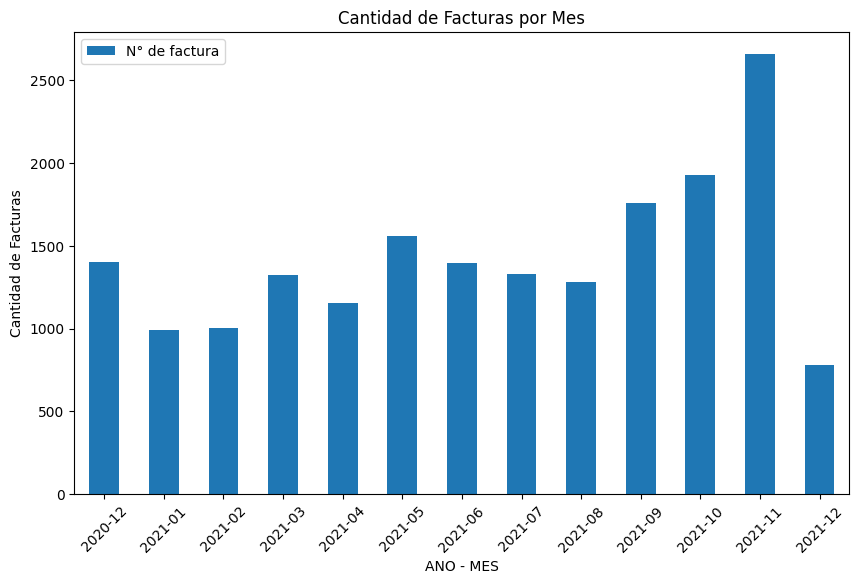

In [9]:
# Convertimos la columna 'Fecha de factura' a tipo datetime
dataset['Fecha de factura'] = pd.to_datetime(dataset['Fecha de factura'])

# Creamos la columna 'ANO - MES - DIA'
dataset['ANO - MES'] = dataset['Fecha de factura'].dt.strftime('%Y-%m')

# Generamos una tabla dinamica
tabla_dinamica = pd.pivot_table(dataset, values='N° de factura', index='ANO - MES', aggfunc='count')

# Gráficamos los valores
tabla_dinamica.plot(kind='bar', figsize=(10, 6))
plt.xlabel('ANO - MES')
plt.ylabel('Cantidad de Facturas')
plt.title('Cantidad de Facturas por Mes')
plt.xticks(rotation=45)
plt.show()

No se puede asegurar que hay una estacionalidad dado que sólo tenemos un año de datos. Pero algo que se aprecia es que en noviembre hay un crecimiento grande en las ventas, tal vez puede deberse a las ventas de pre-fiestas navideñas. Sin embargo, vemos que en diciembre existe una caída pronunciada debido al efecto post-fiestas navideñas. Muchas personas realizan sus compras anticipadas durante noviembre, lo que llevó a una disminución en la demanda de diciembre. Además, las festividades de fin de año llevan generalmetne a un cambio en los patrones de gasto de los consumidores, ya que priorizan los gastos en regalos y celebraciones.

## Número de facturas UK vs Extranjero por mes

Dado que UK Merch abrió sus fronteras a otros países, es buena idea reportar como están yendo estas ventas y poder evidenciar si existe el mercado. Por lo que vamos a segmentar a nuestros clientes en dos grupos: aquellos que pertenecen a UK y los que no.

In [10]:
# Función para determinar si el cliente pertenece a UK o no
def es_uk(País):
    if País == 'United Kingdom':
        return 'Si'
    else:
        return 'No'
    
# Aplicar la función a la columna País para obtener la nueva columna
dataset['¿Pertenece a UK?'] = dataset['País'].apply(es_uk)
print(dataset)

       N° de factura    Fecha de factura  ID Cliente            País  \
0             548370 2021-03-30 16:14:00     15528.0  United Kingdom   
12049         559658 2021-07-11 13:06:00     13003.0  United Kingdom   
12055         547541 2021-03-23 15:22:00     14607.0  United Kingdom   
12054         563742 2021-08-19 08:57:00     17929.0  United Kingdom   
12053         563933 2021-08-21 15:54:00     16536.0  United Kingdom   
...              ...                 ...         ...             ...   
16317         553900 2021-05-19 17:47:00     12353.0         Bahrain   
10163         571035 2021-10-13 12:50:00     12446.0             RSA   
9527          550201 2021-04-15 10:25:00     12769.0          Brazil   
8820          542276 2021-01-27 10:19:00     12764.0         Lebanon   
17943         544838 2021-02-24 10:34:00     12565.0    Saudi Arabia   

       Cantidad    Monto  Num_Facturas  Porcentaje_facturas  Monto_Sumado  \
0           123   229.33         16676            89.82010

## Cantidad de clientes nuevos por mes

Ya vimo que Noviembre fue un mes muy bueno para UK Merch. Este aumento en venta se puede deber a que algunos pocos clientes hicieron muchas compras, o que una gran cantidad de clientes hicieron aumentar el volumen de compras. Para resolver esta duda, una buena idea es gráficar mes a mes la cantidad de clientes únicos y ver si el aumento d elas facturas está relacionado con el aumneto de clientes únicos.

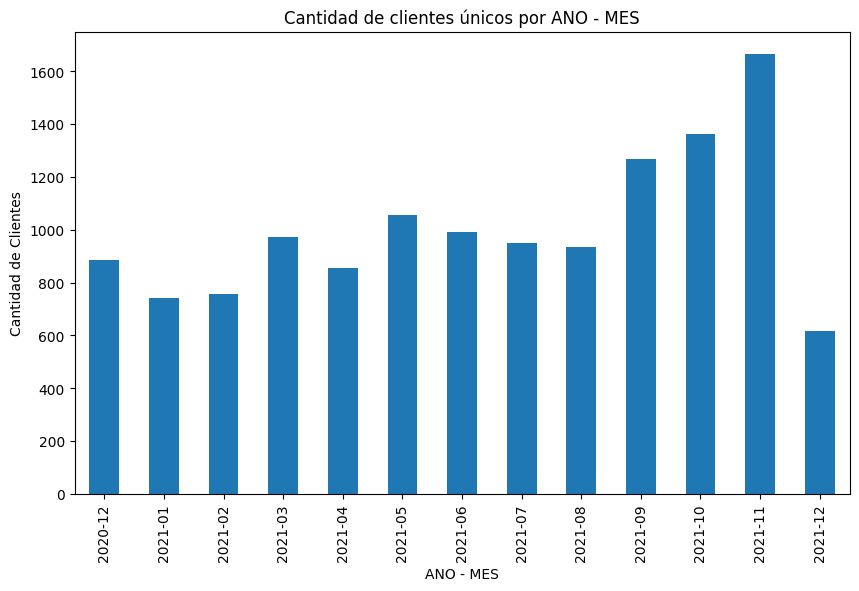

In [11]:
clientes_por_mes = dataset.groupby('ANO - MES')['ID Cliente'].nunique()

# Gráficar la cantidad de clientes únicos por ANO - MES
clientes_por_mes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('ANO - MES')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de clientes únicos por ANO - MES')
plt.show()

Si observamos en detalle podemos ver que hay un aumento significativo en la cantidad de clientes únicos en noviembre en comparación con los meses anteriores. Podemos inferir que el éxito se debe al crecimiento en el número de clientes.

## Métricas para entender mejor a los clientes

El objetivo de estas nuevas metricas es obtener información relevante sobre los clientes que más compras han realizado, que clientes gastaron más y analizar como se comporta el monto mes a mes.

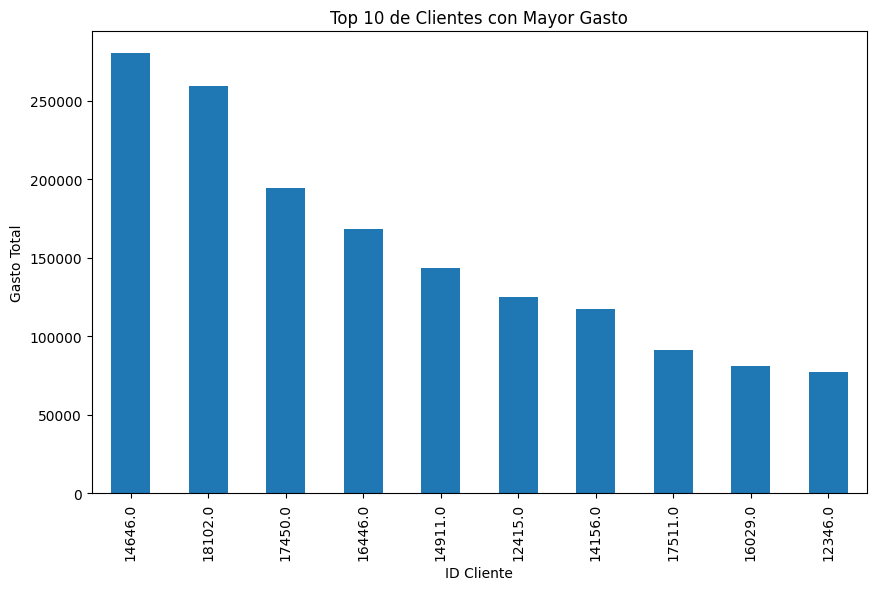

In [12]:
# Tabulación de clientes
clientes_compras = dataset.groupby('ID Cliente')['Monto'].count().sort_values(ascending=True)

# Clientes que más gastaron
clientes_gasto = dataset.groupby('ID Cliente')['Monto'].sum().sort_values(ascending=False).head(10)
clientes_gasto.plot(kind='bar', figsize=(10, 6))
plt.xlabel('ID Cliente')
plt.ylabel('Gasto Total')
plt.title('Top 10 de Clientes con Mayor Gasto')
plt.show()

Podemos observar que el cliente con ID: 14646 gastó más de $250.000

Ahora vamos a observar el comportamiento de los clientes por País mes a mes, tanto los que son pertenecientes a UK como los que no

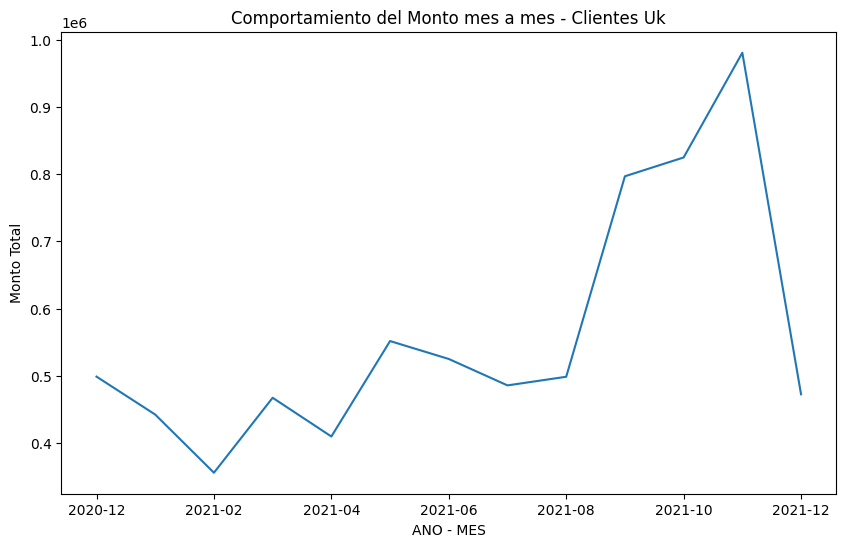

In [13]:
clientes_uk = dataset[dataset['País'] == 'United Kingdom']

# Análisis cómo se comporta el monto mes a mes en clientes UK
montos_mes_uk = clientes_uk.groupby('ANO - MES')['Monto'].sum()
montos_mes_uk.plot(figsize=(10, 6))
plt.xlabel('ANO - MES')
plt.ylabel('Monto Total')
plt.title('Comportamiento del Monto mes a mes - Clientes Uk')
plt.show()

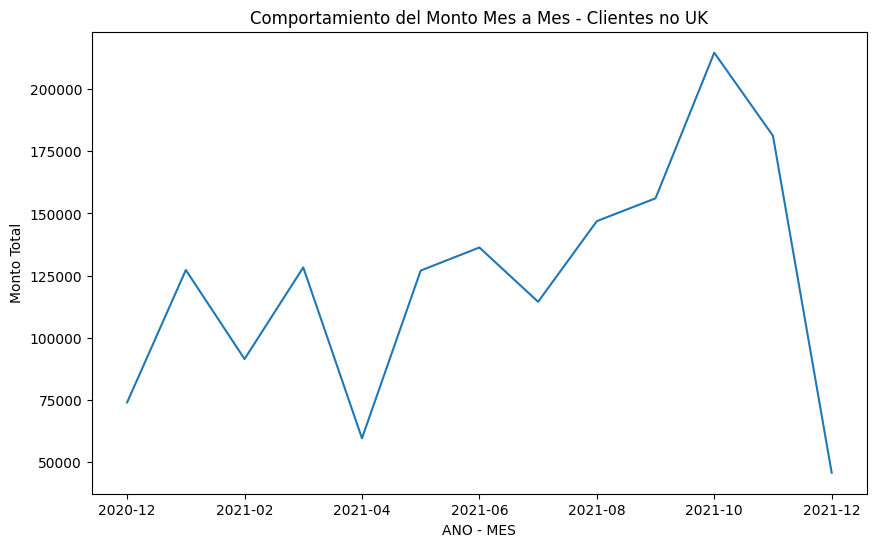

In [14]:
clientes_no_uk = dataset[dataset['País'] != 'United Kingdom']

# Analisis clientes no uk
montos_mes_no_uk = clientes_no_uk.groupby('ANO - MES')['Monto'].sum()
montos_mes_no_uk.plot(figsize=(10, 6))
plt.xlabel('ANO - MES')
plt.ylabel('Monto Total')
plt.title('Comportamiento del Monto Mes a Mes - Clientes no UK')
plt.show()

## Clasificación de Clientes basado en Frecuencia y Recencia

Vamos a clasificar a los clientes en diferentes segmentos en función de la frecuencia de compra y recencia de sus transacciones. Calcularemos la frencuencia de compra de cada cliente, que representa el número de facturas realizadas por cada uno. Además determinaremos la recencia de cada cliente, que es la cantidad de días transcurridos desde su última compra

In [16]:
frecuencia_compra = dataset['Num_Facturas']

# Calcula recencia de cada cliente
fecha_actual = pd.to_datetime('2022 - 01 - 01')
fecha_factura = pd.to_datetime(dataset['Fecha de factura'])
recencia = (fecha_actual - fecha_factura).dt.days

# Calcular el tiempo activo de cada cliente
primera_factura = fecha_factura.groupby(dataset['ID Cliente']).transform('min')
tiempo_activo = (fecha_actual - primera_factura).dt.days

# Calcular el monto toal gastado por cada cliente
monto_total = dataset['Monto_Sumado']

# Crear una nueva columna en el dataset para la clasificacion de clientes
dataset['Clasificacion'] = ''

# Definir los umbrales de frecuencia y recencia
umbral_frecuencia = 15
umbral_recencia = 50

# Clasificar a los clientes según las métricas calculadas
dataset.loc[(frecuencia_compra > umbral_frecuencia) & (recencia < umbral_recencia), 'Clasificacion'] = 'Leales y comprometidos'
dataset.loc[(frecuencia_compra < umbral_frecuencia) & (recencia > umbral_recencia), 'Clasificacion'] = 'Inactivos o en riesgo'
dataset.loc[(frecuencia_compra > umbral_frecuencia) & (recencia > umbral_recencia), 'Clasificacion'] = 'Leales pero menos comprometidos'
dataset.loc[(frecuencia_compra < umbral_frecuencia) & (recencia < umbral_recencia), 'Clasificacion'] = 'Nuevos o poco comprometidos'

# Mostra el dataset con la clasificacion de clientes
print(dataset)

       N° de factura    Fecha de factura  ID Cliente            País  \
0             548370 2021-03-30 16:14:00     15528.0  United Kingdom   
12049         559658 2021-07-11 13:06:00     13003.0  United Kingdom   
12055         547541 2021-03-23 15:22:00     14607.0  United Kingdom   
12054         563742 2021-08-19 08:57:00     17929.0  United Kingdom   
12053         563933 2021-08-21 15:54:00     16536.0  United Kingdom   
...              ...                 ...         ...             ...   
16317         553900 2021-05-19 17:47:00     12353.0         Bahrain   
10163         571035 2021-10-13 12:50:00     12446.0             RSA   
9527          550201 2021-04-15 10:25:00     12769.0          Brazil   
8820          542276 2021-01-27 10:19:00     12764.0         Lebanon   
17943         544838 2021-02-24 10:34:00     12565.0    Saudi Arabia   

       Cantidad    Monto  Num_Facturas  Porcentaje_facturas  Monto_Sumado  \
0           123   229.33         16676            89.82010

Después de aplicar los criterios de clasificación, se asignamos una etiqueta a cada cliente en función de su segmento correspondiente, clasificandolos entre 'Inactivos o en riesgo', 'Leales y comprometidos', 'Leales pero menos comprometidos', 'Nuevos o poco comprometidos'.